In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

In [3]:
with open("census.csv", "w") as raw_data:
    raw_data.write(','.join(
        ['age', 'workclass', 'fnwgt',
         'education', 'education-num',
         'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain',
         'capital-loss', 'hours-per-week',
         'native-country', 'flag']) + '\n')
    raw_data.writelines(
        requests.get(
            "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data").text)


In [4]:
df = pd.read_csv("census.csv")

In [5]:
df.head()

,age,workclass,fnwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
from sklearn import tree
import graphviz

In [7]:
education = set(df['education'])
education

{' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college'}

In [8]:
sex = set(df['sex'])
sex

{' Female', ' Male'}

In [9]:
# education_map = {item: idx for idx, item in enumerate(education)}
education_map = {
 ' 10th': 4,
 ' 11th': 5,
 ' 12th': 6,
 ' 1st-4th': 0,
 ' 5th-6th': 1,
 ' 7th-8th': 2,
 ' 9th': 3,
 ' Assoc-acdm': 8,
 ' Assoc-voc': 8,
 ' Bachelors': 9,
 ' Doctorate': 11,
 ' HS-grad': 7,
 ' Masters': 10,
 ' Preschool': -1,
 ' Prof-school': 8,
 ' Some-college': 8
}
sex_map = {item: idx for idx, item in enumerate(sex)}
def remap(row):
    return education_map[row]
    #row[1] = sex_map[row[1]]

In [10]:
reduced = df['education'].apply(lambda row: remap(row))
type(reduced)

pandas.core.series.Series

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

clf = clf.fit(reduced.values.reshape(-1,1), df['flag'].apply(lambda x: 0 if '<=50K' in x else 1))

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['education'], class_names=['less', 'more'], filled=True)

In [13]:
graph = graphviz.Source(dot_data, format='png')
graph.render("example2")

'example2.png'

In [14]:
df[['age']].describe()

,age
count,32561.000000
mean,38.581647
std,13.640433
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


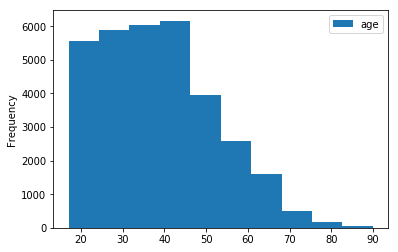

In [15]:
df[['age']].plot(kind='hist');

In [16]:
for idx, row in df.iterrows():
    print(row)
    print(row['age'])
    break

age                           39
workclass              State-gov
fnwgt                      77516
education              Bachelors
education-num                 13
marital-status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital-gain                2174
capital-loss                   0
hours-per-week                40
native-country     United-States
flag                       <=50K
Name: 0, dtype: object
39


In [18]:
dir(clf.tree_)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [21]:
clf.tree_.value[0].min()

7841.0

In [22]:
from sklearn.tree._tree import TREE_LEAF

In [23]:
dir(TREE_LEAF)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']